In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [232]:
def BruteForcePareto(functions, lb, ub, varNum = 100):
    pareto_front_ids = []
    
    dim = len(lb)
    fNum = len(functions)

    # Initialzing function variables as random n-dimensional points with values between lower and upper bounds
    x = np.random.random((varNum, dim)) * (ub - lb) + lb

    # Calculating function values of said variables
    y = np.empty((varNum, fNum))
    for i in range(fNum):
        y[:, i] = np.array(functions[i](x))

    for i in range(varNum):
        is_pareto_optimal = True
        # Checking if any other variable completely dominates the current one
        for j in range(varNum):
            if i != j:
                is_dominated = True
                for k in range(fNum):
                    is_dominated &= y[:,k][i] > y[:,k][j]
                if is_dominated:
                    is_pareto_optimal = False
                    break
        if is_pareto_optimal:
            # Keeping indices of pareto_optimal points
            pareto_front_ids.append(i)

    # Plotting results
    plt.xlabel('f1(x)')
    plt.ylabel('f2(x)')
    if fNum == 2:
        plt.scatter(y[:,0], y[:,1])
        plt.scatter(y[pareto_front_ids[:], 0], y[pareto_front_ids[:],1], label = 'pareto_front')
        plt.legend()
    elif fNum == 3:
        plt.zlabel('f3(x)')
        plt.scatter(y[:,0], y[:,1], y[:,2])
        plt.scatter(y[pareto_front_ids[:], 0], y[pareto_front_ids[:],1], y[pareto_front_ids[:],2], label = 'pareto_front')
        plt.legend()
    else:
        print("Too many dimensions to plot!")

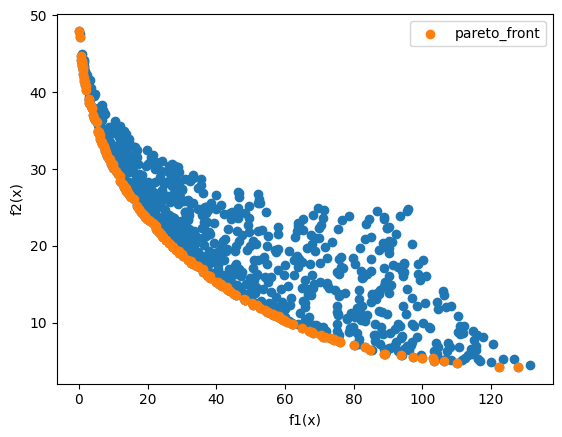

In [233]:
# Bihn and Korn function without constraints
# 0 <= x <= 5
# 0 <= y <= 3

def f1(x):
    return 4*(x[:,0]**2 + x[:,1]**2)

def f2(x):
    return (x[:,0]-5)**2 + (x[:,1]-5)**2

lower_bounds = np.array([0, 0])
upper_bounds = np.array([5, 3])
varNum = 1000

BruteForcePareto(functions=[f1, f2], lb=lower_bounds, ub=upper_bounds, varNum=varNum)

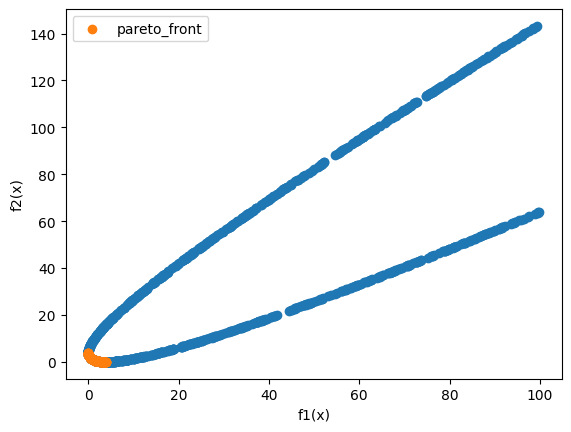

In [234]:
# Schaffer function N.1
# -A <= X <= A, where A is between 10 and 10e5, higher A's increasing the difficulty of the problem

def f1(x):
    return x[:,0]**2

def f2(x):
    return (x[:,0]-2)**2

A = 10
lower_bounds = np.array([-A])
upper_bounds = np.array([A])
varNum = 1000

BruteForcePareto(functions=[f1, f2], lb=lower_bounds, ub=upper_bounds, varNum=varNum)